In [ ]:
# import the libraries
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization, Dropout

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pathlib
data_dir = 'C:/Users/anant/Downloads/Claheclasses_1/Claheclasses_1'
data_dir = pathlib.Path(data_dir)

In [11]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

10304


In [12]:
batch_size = 32
img_height = 299
img_width = 299

In [15]:
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle = True,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 10304 files belonging to 2 classes.


In [16]:
class_names = dataset.class_names
print(class_names)

['0', '1']


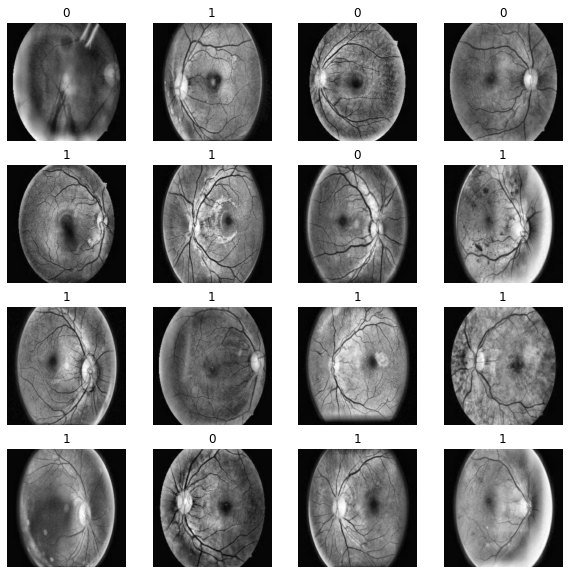

In [17]:
plt.figure(figsize=(10, 10))
for images_batch, labels_batch in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [18]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10304 files belonging to 2 classes.
Using 7213 files for training.


In [19]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10304 files belonging to 2 classes.
Using 3091 files for validation.


In [20]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.5, seed=None),
    layers.RandomCrop(150, 150, seed=None)
  ]
)

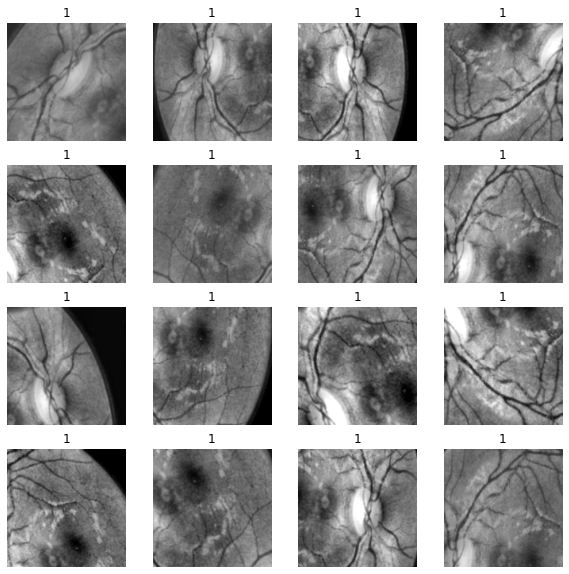

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

In [23]:
num_classes = len(class_names)

# Transfer Learning

In [24]:
preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input

In [25]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [26]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2L
from tensorflow.keras.models import Model

In [27]:
base_eff = model = EfficientNetV2L(weights='imagenet', include_top=False)
base_eff.summary()

Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_1 (Rescaling)        (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, None, None,   864         ['rescaling_1[0][0]']            
                                32)                                                

 ivation)                       128)                                                              
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   8192        ['block2a_expand_activation[0][0]
                                64)                              ']                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   256        ['block2a_project_conv[0][0]']   
 lization)                      64)                                                               
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, None, None,   147456      ['block2a_project_bn[0][0]']     
                                256)                                                              
          

 block2e_project_bn (BatchNorma  (None, None, None,   256        ['block2e_project_conv[0][0]']   
 lization)                      64)                                                               
                                                                                                  
 block2e_drop (Dropout)         (None, None, None,   0           ['block2e_project_bn[0][0]']     
                                64)                                                               
                                                                                                  
 block2e_add (Add)              (None, None, None,   0           ['block2e_drop[0][0]',           
                                64)                               'block2d_add[0][0]']            
                                                                                                  
 block2f_expand_conv (Conv2D)   (None, None, None,   147456      ['block2e_add[0][0]']            
          

                                                                                                  
 block3b_add (Add)              (None, None, None,   0           ['block3b_drop[0][0]',           
                                96)                               'block3a_project_bn[0][0]']     
                                                                                                  
 block3c_expand_conv (Conv2D)   (None, None, None,   331776      ['block3b_add[0][0]']            
                                384)                                                              
                                                                                                  
 block3c_expand_bn (BatchNormal  (None, None, None,   1536       ['block3c_expand_conv[0][0]']    
 ization)                       384)                                                              
                                                                                                  
 block3c_e

                                96)                                                               
                                                                                                  
 block3f_add (Add)              (None, None, None,   0           ['block3f_drop[0][0]',           
                                96)                               'block3e_add[0][0]']            
                                                                                                  
 block3g_expand_conv (Conv2D)   (None, None, None,   331776      ['block3f_add[0][0]']            
                                384)                                                              
                                                                                                  
 block3g_expand_bn (BatchNormal  (None, None, None,   1536       ['block3g_expand_conv[0][0]']    
 ization)                       384)                                                              
          

 block4b_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 48)     36912       ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_se_expand (Conv2D)     (None, 1, 1, 768)    37632       ['block4b_se_reduce[0][0]']      
                                                                                                  
 block4b_se_excite (Multiply)   (None, None, None,   0           ['block4b_activation[0][0]',     
                                768)                              'block4b_se_expand[0][0]']      
                                                                                                  
 block4b_project_conv (Conv2D)  (None, None, None,   147456      ['block4b_se_excite[0][0]']      
          

                                                                                                  
 block4d_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4d_se_squeeze[0][0]']     
                                                                                                  
 block4d_se_reduce (Conv2D)     (None, 1, 1, 48)     36912       ['block4d_se_reshape[0][0]']     
                                                                                                  
 block4d_se_expand (Conv2D)     (None, 1, 1, 768)    37632       ['block4d_se_reduce[0][0]']      
                                                                                                  
 block4d_se_excite (Multiply)   (None, None, None,   0           ['block4d_activation[0][0]',     
                                768)                              'block4d_se_expand[0][0]']      
                                                                                                  
 block4d_p

 agePooling2D)                                                                                    
                                                                                                  
 block4f_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4f_se_squeeze[0][0]']     
                                                                                                  
 block4f_se_reduce (Conv2D)     (None, 1, 1, 48)     36912       ['block4f_se_reshape[0][0]']     
                                                                                                  
 block4f_se_expand (Conv2D)     (None, 1, 1, 768)    37632       ['block4f_se_reduce[0][0]']      
                                                                                                  
 block4f_se_excite (Multiply)   (None, None, None,   0           ['block4f_activation[0][0]',     
                                768)                              'block4f_se_expand[0][0]']      
          

 block4h_se_squeeze (GlobalAver  (None, 768)         0           ['block4h_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4h_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4h_se_squeeze[0][0]']     
                                                                                                  
 block4h_se_reduce (Conv2D)     (None, 1, 1, 48)     36912       ['block4h_se_reshape[0][0]']     
                                                                                                  
 block4h_se_expand (Conv2D)     (None, 1, 1, 768)    37632       ['block4h_se_reduce[0][0]']      
                                                                                                  
 block4h_se_excite (Multiply)   (None, None, None,   0           ['block4h_activation[0][0]',     
          

                                                                                                  
 block4j_se_squeeze (GlobalAver  (None, 768)         0           ['block4j_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4j_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4j_se_squeeze[0][0]']     
                                                                                                  
 block4j_se_reduce (Conv2D)     (None, 1, 1, 48)     36912       ['block4j_se_reshape[0][0]']     
                                                                                                  
 block4j_se_expand (Conv2D)     (None, 1, 1, 768)    37632       ['block4j_se_reduce[0][0]']      
                                                                                                  
 block4j_s

                                                                                                  
 block5b_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5b_se_reshape[0][0]']     
                                                                                                  
 block5b_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5b_se_reduce[0][0]']      
                                                                                                  
 block5b_se_excite (Multiply)   (None, None, None,   0           ['block5b_activation[0][0]',     
                                1344)                             'block5b_se_expand[0][0]']      
                                                                                                  
 block5b_project_conv (Conv2D)  (None, None, None,   301056      ['block5b_se_excite[0][0]']      
                                224)                                                              
          

 block5d_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5d_se_squeeze[0][0]']     
                                                                                                  
 block5d_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5d_se_reshape[0][0]']     
                                                                                                  
 block5d_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5d_se_reduce[0][0]']      
                                                                                                  
 block5d_se_excite (Multiply)   (None, None, None,   0           ['block5d_activation[0][0]',     
                                1344)                             'block5d_se_expand[0][0]']      
                                                                                                  
 block5d_project_conv (Conv2D)  (None, None, None,   301056      ['block5d_se_excite[0][0]']      
          

                                                                                                  
 block5f_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5f_se_squeeze[0][0]']     
                                                                                                  
 block5f_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5f_se_reshape[0][0]']     
                                                                                                  
 block5f_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5f_se_reduce[0][0]']      
                                                                                                  
 block5f_se_excite (Multiply)   (None, None, None,   0           ['block5f_activation[0][0]',     
                                1344)                             'block5f_se_expand[0][0]']      
                                                                                                  
 block5f_p

 agePooling2D)                                                                                    
                                                                                                  
 block5h_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5h_se_squeeze[0][0]']     
                                                                                                  
 block5h_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5h_se_reshape[0][0]']     
                                                                                                  
 block5h_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5h_se_reduce[0][0]']      
                                                                                                  
 block5h_se_excite (Multiply)   (None, None, None,   0           ['block5h_activation[0][0]',     
                                1344)                             'block5h_se_expand[0][0]']      
          

 block5j_se_squeeze (GlobalAver  (None, 1344)        0           ['block5j_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5j_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5j_se_squeeze[0][0]']     
                                                                                                  
 block5j_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5j_se_reshape[0][0]']     
                                                                                                  
 block5j_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5j_se_reduce[0][0]']      
                                                                                                  
 block5j_se_excite (Multiply)   (None, None, None,   0           ['block5j_activation[0][0]',     
          

                                                                                                  
 block5l_se_squeeze (GlobalAver  (None, 1344)        0           ['block5l_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5l_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5l_se_squeeze[0][0]']     
                                                                                                  
 block5l_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5l_se_reshape[0][0]']     
                                                                                                  
 block5l_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5l_se_reduce[0][0]']      
                                                                                                  
 block5l_s

 )                              1344)                                                             
                                                                                                  
 block5n_se_squeeze (GlobalAver  (None, 1344)        0           ['block5n_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5n_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5n_se_squeeze[0][0]']     
                                                                                                  
 block5n_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5n_se_reshape[0][0]']     
                                                                                                  
 block5n_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5n_se_reduce[0][0]']      
          

 block5p_activation (Activation  (None, None, None,   0          ['block5p_bn[0][0]']             
 )                              1344)                                                             
                                                                                                  
 block5p_se_squeeze (GlobalAver  (None, 1344)        0           ['block5p_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5p_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5p_se_squeeze[0][0]']     
                                                                                                  
 block5p_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5p_se_reshape[0][0]']     
                                                                                                  
 block5p_s

                                                                                                  
 block5r_activation (Activation  (None, None, None,   0          ['block5r_bn[0][0]']             
 )                              1344)                                                             
                                                                                                  
 block5r_se_squeeze (GlobalAver  (None, 1344)        0           ['block5r_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5r_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5r_se_squeeze[0][0]']     
                                                                                                  
 block5r_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5r_se_reshape[0][0]']     
          

 )                              1344)                                                             
                                                                                                  
 block6a_activation (Activation  (None, None, None,   0          ['block6a_bn[0][0]']             
 )                              1344)                                                             
                                                                                                  
 block6a_se_squeeze (GlobalAver  (None, 1344)        0           ['block6a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6a_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block6a_se_squeeze[0][0]']     
                                                                                                  
 block6a_s

 block6c_se_squeeze (GlobalAver  (None, 2304)        0           ['block6c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6c_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6c_se_squeeze[0][0]']     
                                                                                                  
 block6c_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6c_se_reshape[0][0]']     
                                                                                                  
 block6c_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6c_se_reduce[0][0]']      
                                                                                                  
 block6c_se_excite (Multiply)   (None, None, None,   0           ['block6c_activation[0][0]',     
          

                                                                                                  
 block6e_se_squeeze (GlobalAver  (None, 2304)        0           ['block6e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6e_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6e_se_squeeze[0][0]']     
                                                                                                  
 block6e_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6e_se_reshape[0][0]']     
                                                                                                  
 block6e_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6e_se_reduce[0][0]']      
                                                                                                  
 block6e_s

 )                              2304)                                                             
                                                                                                  
 block6g_se_squeeze (GlobalAver  (None, 2304)        0           ['block6g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6g_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6g_se_squeeze[0][0]']     
                                                                                                  
 block6g_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6g_se_reshape[0][0]']     
                                                                                                  
 block6g_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6g_se_reduce[0][0]']      
          

 block6i_activation (Activation  (None, None, None,   0          ['block6i_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6i_se_squeeze (GlobalAver  (None, 2304)        0           ['block6i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6i_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6i_se_squeeze[0][0]']     
                                                                                                  
 block6i_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6i_se_reshape[0][0]']     
                                                                                                  
 block6i_s

                                                                                                  
 block6k_activation (Activation  (None, None, None,   0          ['block6k_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6k_se_squeeze (GlobalAver  (None, 2304)        0           ['block6k_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6k_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6k_se_squeeze[0][0]']     
                                                                                                  
 block6k_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6k_se_reshape[0][0]']     
          

 )                              2304)                                                             
                                                                                                  
 block6m_activation (Activation  (None, None, None,   0          ['block6m_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6m_se_squeeze (GlobalAver  (None, 2304)        0           ['block6m_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6m_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6m_se_squeeze[0][0]']     
                                                                                                  
 block6m_s

 block6o_bn (BatchNormalization  (None, None, None,   9216       ['block6o_dwconv2[0][0]']        
 )                              2304)                                                             
                                                                                                  
 block6o_activation (Activation  (None, None, None,   0          ['block6o_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6o_se_squeeze (GlobalAver  (None, 2304)        0           ['block6o_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6o_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6o_se_squeeze[0][0]']     
          

                                                                                                  
 block6q_bn (BatchNormalization  (None, None, None,   9216       ['block6q_dwconv2[0][0]']        
 )                              2304)                                                             
                                                                                                  
 block6q_activation (Activation  (None, None, None,   0          ['block6q_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6q_se_squeeze (GlobalAver  (None, 2304)        0           ['block6q_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6q_s

 2D)                            2304)                            ']                               
                                                                                                  
 block6s_bn (BatchNormalization  (None, None, None,   9216       ['block6s_dwconv2[0][0]']        
 )                              2304)                                                             
                                                                                                  
 block6s_activation (Activation  (None, None, None,   0          ['block6s_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6s_se_squeeze (GlobalAver  (None, 2304)        0           ['block6s_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block6u_dwconv2 (DepthwiseConv  (None, None, None,   20736      ['block6u_expand_activation[0][0]
 2D)                            2304)                            ']                               
                                                                                                  
 block6u_bn (BatchNormalization  (None, None, None,   9216       ['block6u_dwconv2[0][0]']        
 )                              2304)                                                             
                                                                                                  
 block6u_activation (Activation  (None, None, None,   0          ['block6u_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6u_se_squeeze (GlobalAver  (None, 2304)        0           ['block6u_activation[0][0]']     
 agePoolin

                                                                                                  
 block6w_dwconv2 (DepthwiseConv  (None, None, None,   20736      ['block6w_expand_activation[0][0]
 2D)                            2304)                            ']                               
                                                                                                  
 block6w_bn (BatchNormalization  (None, None, None,   9216       ['block6w_dwconv2[0][0]']        
 )                              2304)                                                             
                                                                                                  
 block6w_activation (Activation  (None, None, None,   0          ['block6w_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6w_s

 ivation)                       2304)                                                             
                                                                                                  
 block6y_dwconv2 (DepthwiseConv  (None, None, None,   20736      ['block6y_expand_activation[0][0]
 2D)                            2304)                            ']                               
                                                                                                  
 block6y_bn (BatchNormalization  (None, None, None,   9216       ['block6y_dwconv2[0][0]']        
 )                              2304)                                                             
                                                                                                  
 block6y_activation (Activation  (None, None, None,   0          ['block6y_bn[0][0]']             
 )                              2304)                                                             
          

 block7b_bn (BatchNormalization  (None, None, None,   15360      ['block7b_dwconv2[0][0]']        
 )                              3840)                                                             
                                                                                                  
 block7b_activation (Activation  (None, None, None,   0          ['block7b_bn[0][0]']             
 )                              3840)                                                             
                                                                                                  
 block7b_se_squeeze (GlobalAver  (None, 3840)        0           ['block7b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7b_se_reshape (Reshape)   (None, 1, 1, 3840)   0           ['block7b_se_squeeze[0][0]']     
          

                                                                                                  
 block7d_bn (BatchNormalization  (None, None, None,   15360      ['block7d_dwconv2[0][0]']        
 )                              3840)                                                             
                                                                                                  
 block7d_activation (Activation  (None, None, None,   0          ['block7d_bn[0][0]']             
 )                              3840)                                                             
                                                                                                  
 block7d_se_squeeze (GlobalAver  (None, 3840)        0           ['block7d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7d_s

 2D)                            3840)                            ']                               
                                                                                                  
 block7f_bn (BatchNormalization  (None, None, None,   15360      ['block7f_dwconv2[0][0]']        
 )                              3840)                                                             
                                                                                                  
 block7f_activation (Activation  (None, None, None,   0          ['block7f_bn[0][0]']             
 )                              3840)                                                             
                                                                                                  
 block7f_se_squeeze (GlobalAver  (None, 3840)        0           ['block7f_activation[0][0]']     
 agePooling2D)                                                                                    
          

Total params: 117,746,848
Trainable params: 117,234,272
Non-trainable params: 512,576
__________________________________________________________________________________________________


In [28]:
base_eff.trainable = False

In [29]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_eff(image_batch)
print(feature_batch.shape)

(32, 10, 10, 1280)


In [30]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [31]:
prediction_layer = tf.keras.layers.Dense(8, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 8)


In [38]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x = base_eff(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [39]:
import time
start_cnn = time.time()

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

path = 'best_model_eff.hdf5'
checkpoint = ModelCheckpoint(path, monitor='val_accuracy', verbose = 1, save_best_only = True, mode='max')
es = EarlyStopping(monitor='val_accuracy', patience=10)

callback_list = [checkpoint,es]

In [42]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=callback_list  
)

Epoch 1/50
226/226 [==============================] - ETA: 0s - loss: 0.6708 - accuracy: 0.5828
Epoch 1: val_accuracy improved from -inf to 0.61372, saving model to best_model_eff.hdf5
226/226 [==============================] - 158s 591ms/step - loss: 0.6708 - accuracy: 0.5828 - val_loss: 0.6561 - val_accuracy: 0.6137
Epoch 2/50
226/226 [==============================] - ETA: 0s - loss: 0.6608 - accuracy: 0.5982
Epoch 2: val_accuracy improved from 0.61372 to 0.62181, saving model to best_model_eff.hdf5
226/226 [==============================] - 136s 603ms/step - loss: 0.6608 - accuracy: 0.5982 - val_loss: 0.6534 - val_accuracy: 0.6218
Epoch 3/50
226/226 [==============================] - ETA: 0s - loss: 0.6583 - accuracy: 0.6043
Epoch 3: val_accuracy improved from 0.62181 to 0.62375, saving model to best_model_eff.hdf5
226/226 [==============================] - 122s 539ms/step - loss: 0.6583 - accuracy: 0.6043 - val_loss: 0.6497 - val_accuracy: 0.6237
Epoch 4/50
226/226 [==============

In [43]:
print("Total time: ", time.time() - start_cnn, "seconds")

Total time:  2064.0771391391754 seconds


In [44]:
scores = model.evaluate(train_ds)

226/226 [==============================] - 83s 367ms/step - loss: 0.6270 - accuracy: 0.6461


In [47]:
scores = model.evaluate(val_ds)

97/97 [==============================] - 35s 364ms/step - loss: 0.6399 - accuracy: 0.6192


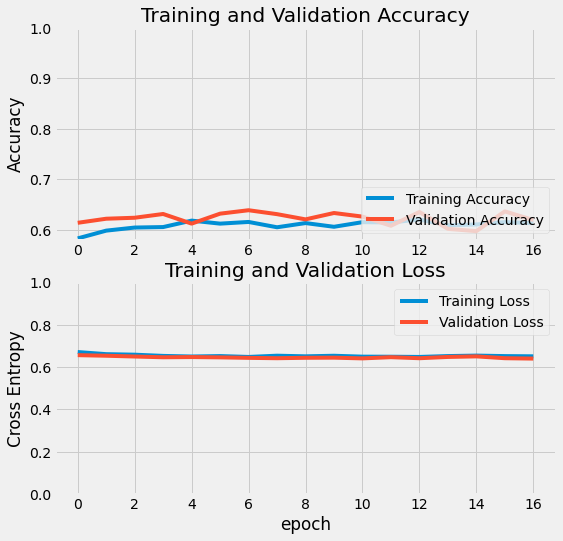

In [48]:
plt.style.use('fivethirtyeight')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Actual label: 0
1/1 [==============================] - 12s 12s/step
[6.4436811e-01 3.5563195e-01 4.1165751e-09 7.5306223e-09 5.2080886e-09
 6.4612293e-09 5.8874394e-09 7.5317139e-09]
predicted label: 0


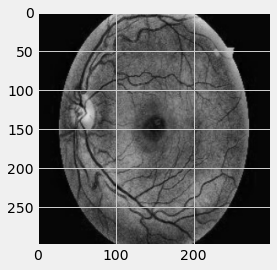

In [49]:
import numpy as np
for images_batch, labels_batch in val_ds.take(1):
    
    first_image = images_batch[5].numpy().astype('uint8')
    first_label = labels_batch[5].numpy()

    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[5])
    print("predicted label:",class_names[np.argmax(batch_prediction[5])])

In [50]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 47ms/step


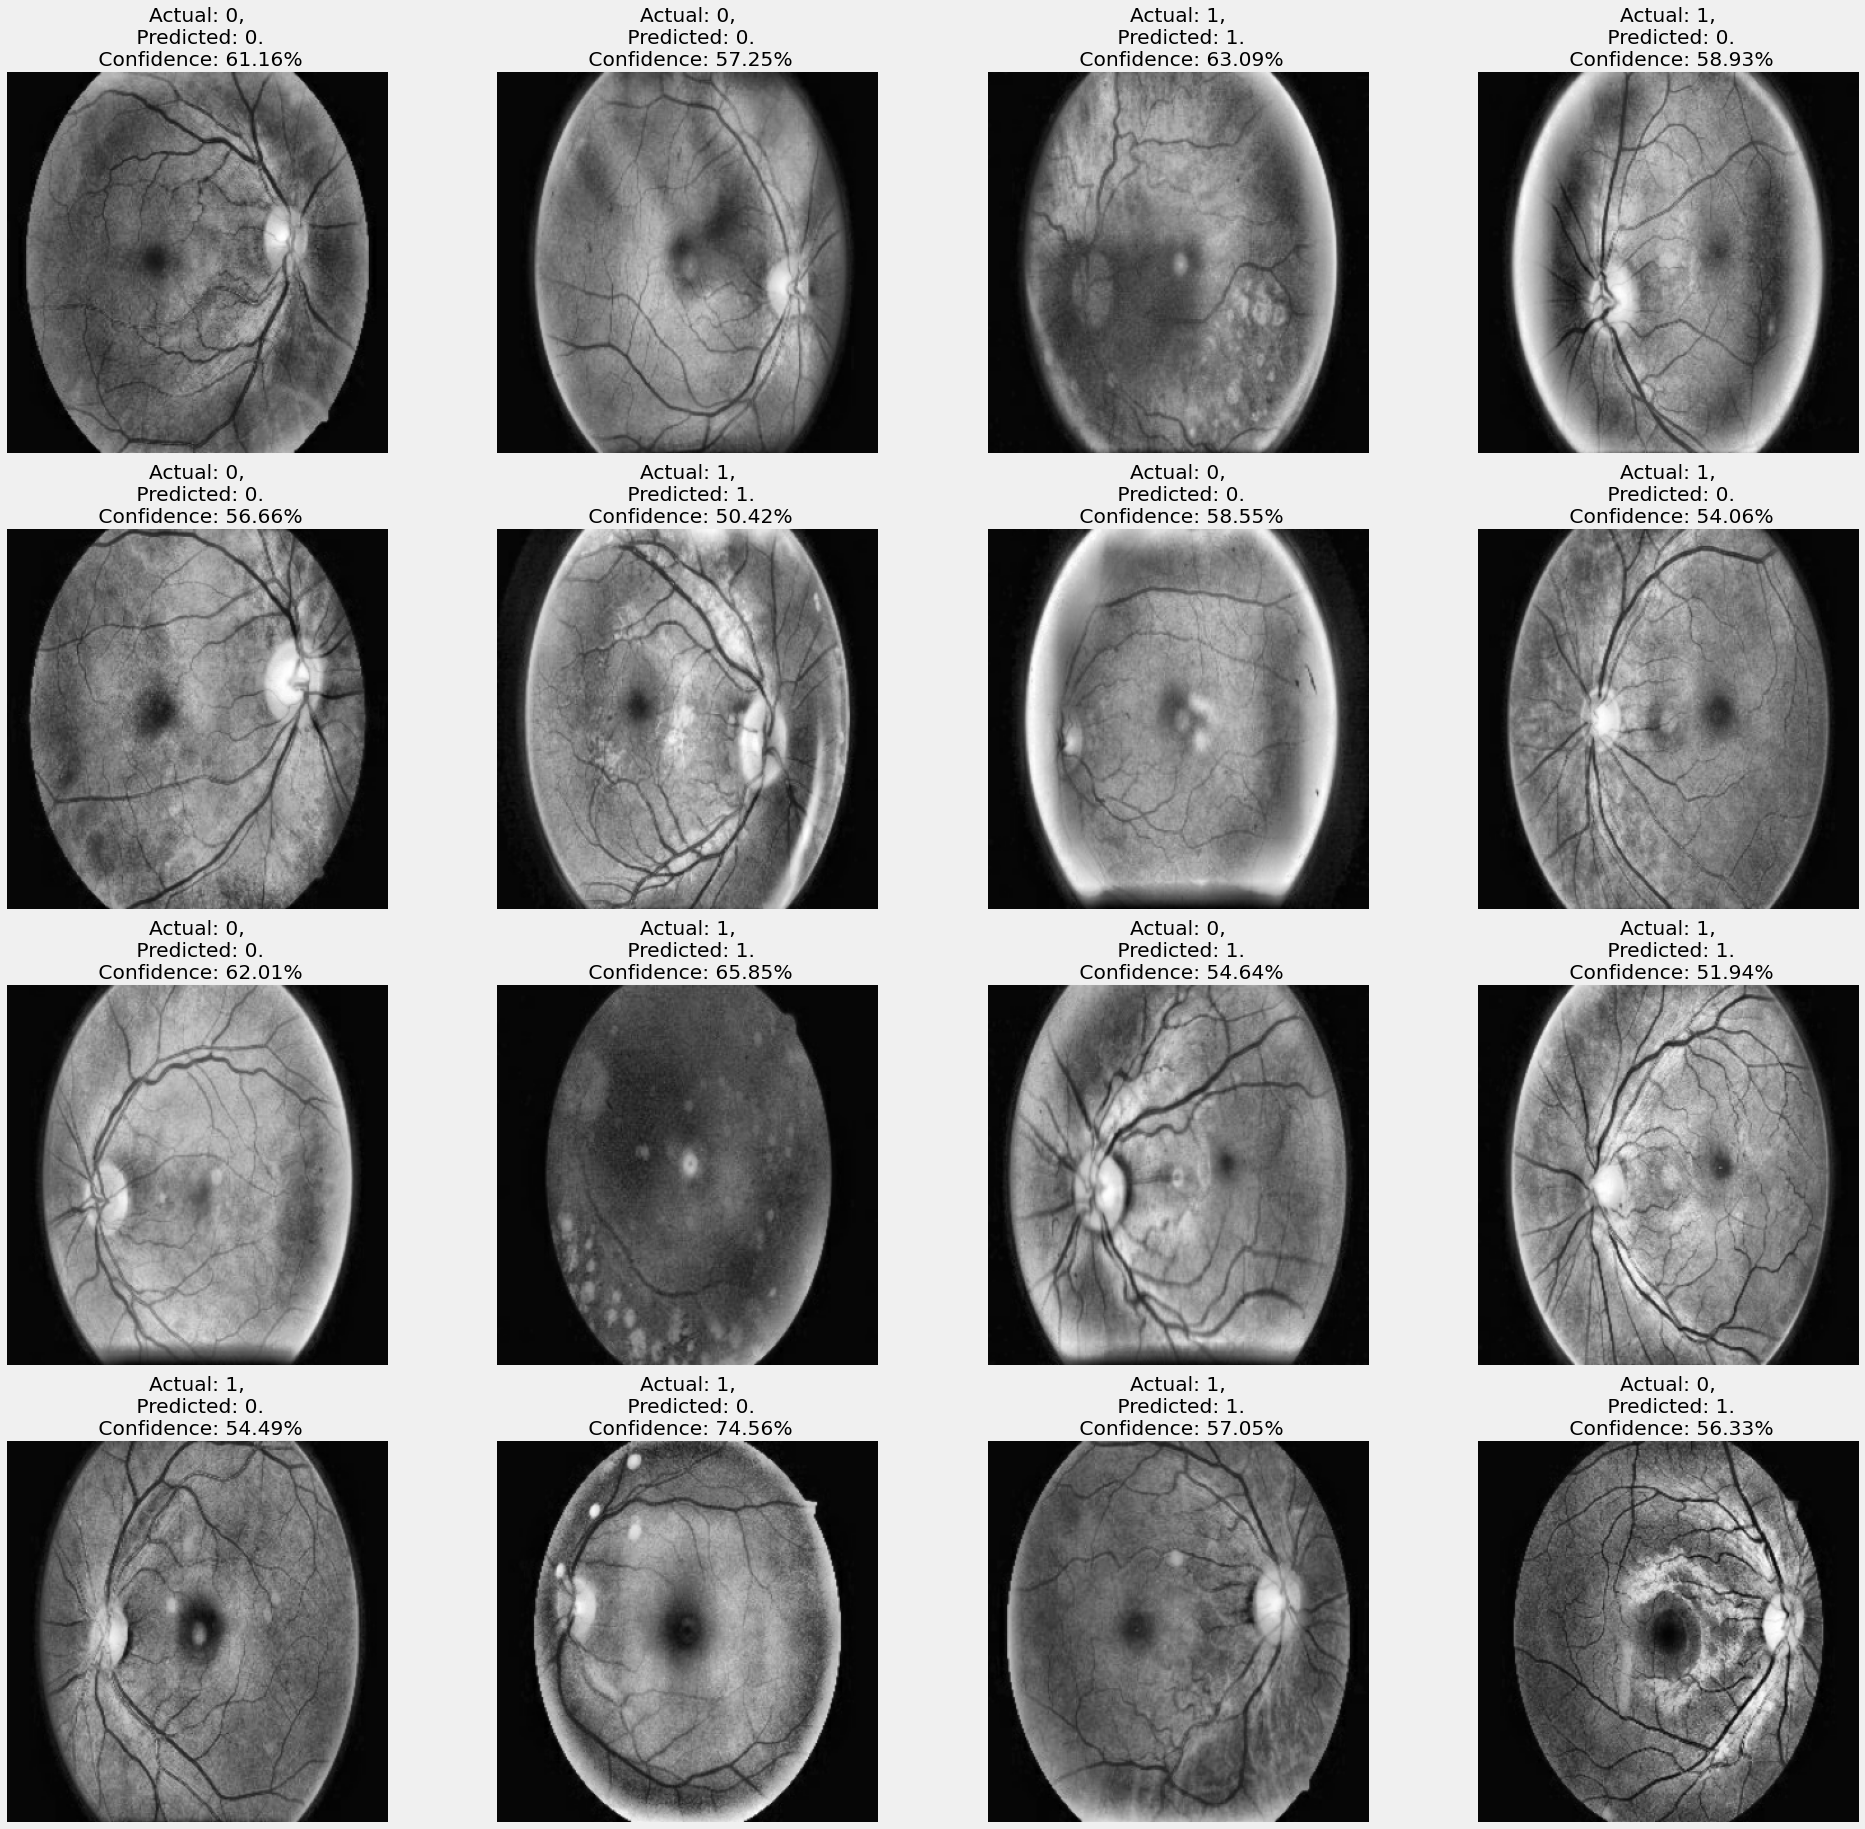

In [51]:
plt.figure(figsize=(30, 30))
for images, labels in val_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [52]:
X = []
y = []
for image,labels in val_ds.take(96):
    for i in image:
        img = i.numpy()
        X.append(img)
    lbl_list = labels.numpy()    
    y.extend(lbl_list)   

In [53]:
x = np.array(X)

In [54]:
y = np.array(y)

In [55]:
x.shape, y.shape

((3059, 299, 299, 3), (3059,))

In [56]:
model.evaluate(x[:1400],y[:1400])

44/44 [==============================] - 17s 367ms/step - loss: 0.6473 - accuracy: 0.6107


[0.6473103761672974, 0.6107142567634583]

In [57]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(x[:1400])
y_pred_classes = [np.argmax(element) for element in y_pred]
 
print("Classification Report: \n", classification_report(y[:1400], y_pred_classes))

44/44 [==============================] - 16s 361ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.56      0.59       714
           1       0.59      0.67      0.63       686

    accuracy                           0.61      1400
   macro avg       0.61      0.61      0.61      1400
weighted avg       0.61      0.61      0.61      1400



In [58]:
base_eff.trainable = True

In [59]:
print("Number of layers in the base model: ", len(base_eff.layers))
    `
fine_tune_at = 1000

for layer in base_eff.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model:  1028


In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
epochs = 100
total_epochs =  epochs + 100
history_fine = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=total_epochs,
  initial_epoch=history.epoch[-1],  
  callbacks=callback_list  
)

Epoch 17/200
226/226 [==============================] - ETA: 0s - loss: 0.7112 - accuracy: 0.5568
Epoch 17: val_accuracy did not improve from 0.63863
226/226 [==============================] - 169s 648ms/step - loss: 0.7112 - accuracy: 0.5568 - val_loss: 0.6540 - val_accuracy: 0.6212
Epoch 18/200
226/226 [==============================] - ETA: 0s - loss: 0.6541 - accuracy: 0.6149
Epoch 18: val_accuracy did not improve from 0.63863
226/226 [==============================] - 125s 552ms/step - loss: 0.6541 - accuracy: 0.6149 - val_loss: 0.6446 - val_accuracy: 0.6231
Epoch 19/200
226/226 [==============================] - ETA: 0s - loss: 1.7194 - accuracy: 0.5766
Epoch 19: val_accuracy did not improve from 0.63863
226/226 [==============================] - 121s 534ms/step - loss: 1.7194 - accuracy: 0.5766 - val_loss: 0.7224 - val_accuracy: 0.4927
Epoch 20/200
226/226 [==============================] - ETA: 0s - loss: 0.6966 - accuracy: 0.5268
Epoch 20: val_accuracy did not improve from 0.6

In [62]:
scores = model.evaluate(val_ds)

97/97 [==============================] - 35s 362ms/step - loss: 0.6483 - accuracy: 0.6170


In [63]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(x[:2200])
y_pred_classes = [np.argmax(element) for element in y_pred]
 
print("Classification Report: \n", classification_report(y[:2200], y_pred_classes))

69/69 [==============================] - 39s 359ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.69      0.65      1109
           1       0.64      0.54      0.59      1091

    accuracy                           0.62      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.62      0.62      0.62      2200



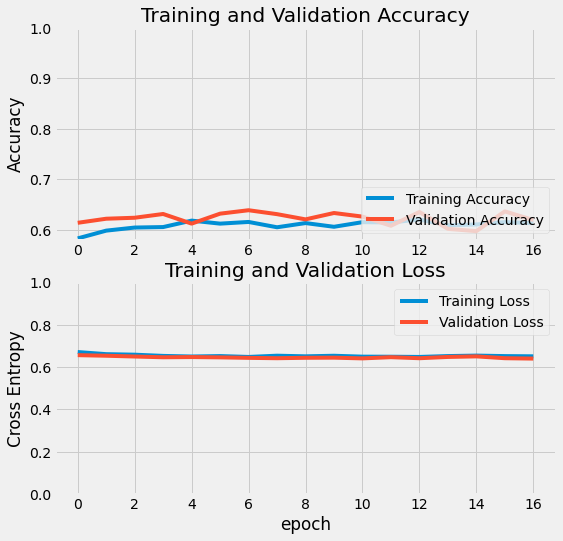

In [64]:
plt.style.use('fivethirtyeight')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()